In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns

In [50]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Glass Identification\Glass.csv")
le = LabelEncoder()
X = df.iloc[:,:-1]
y = le.fit_transform(df.iloc[:,-1])
le.classes_

array(['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'], dtype=object)

In [43]:
## Train_test split whole tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=24)

In [45]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_train, y_train)

plt.figure(figsize=(150,100))
plot_tree(dtc,feature_names=list(X.columns),class_names=le.classes_, filled=True,fontsize=36)
plt.show() 

In [46]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6111111111111112


In [47]:
## Grid search for parameters max_deapth, min samples split, mean samples leaf

In [48]:
kfold = StratifiedKFold(n_splits =5,shuffle = True, random_state = 24)
dtc = DecisionTreeClassifier(random_state=24)
params= {"max_depth":[None,2,3,4,5,6,7,8],"min_samples_split": np.arange(2,20),"min_samples_leaf":np.arange(1,15)}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring="neg_log_loss")
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
-1.8450088600844896


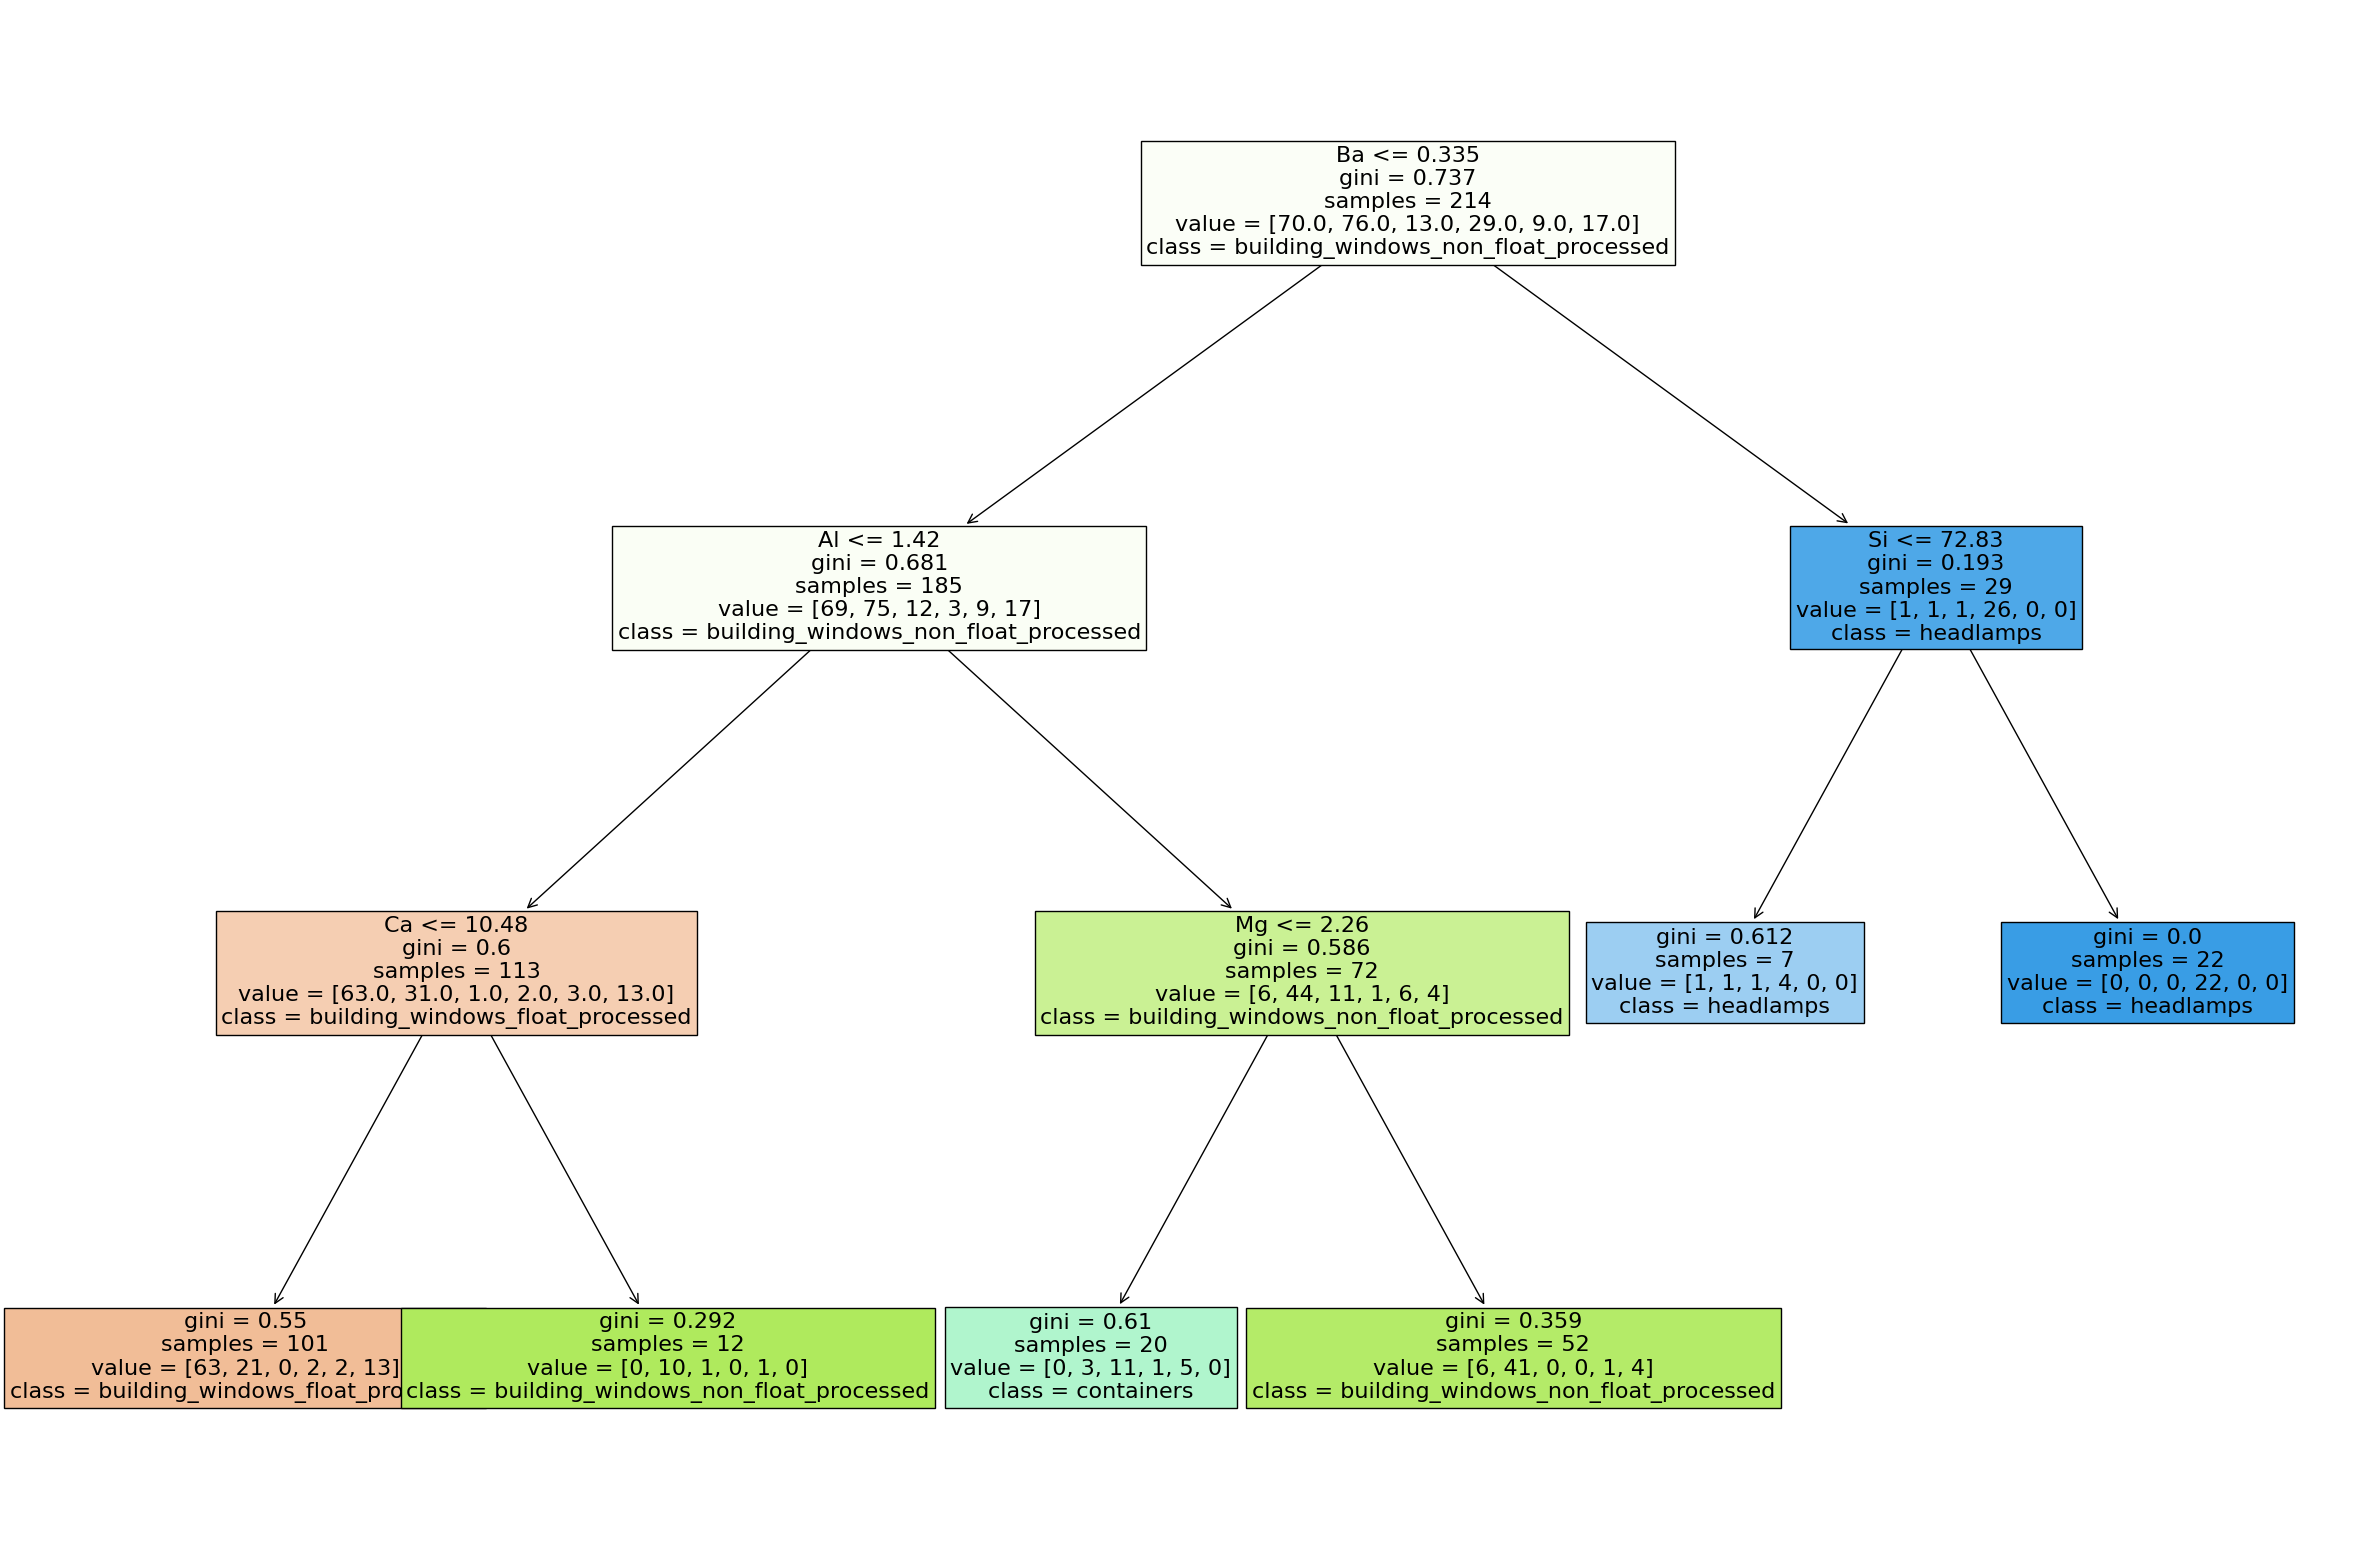

In [52]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(30,20))
plot_tree(best_tree,feature_names=list(X.columns), class_names=le.classes_, filled=True,fontsize=16)
plt.show() 

In [56]:
df_imp = pd.DataFrame({"Feature":list(X.columns),"Importance":best_tree.feature_importances_})

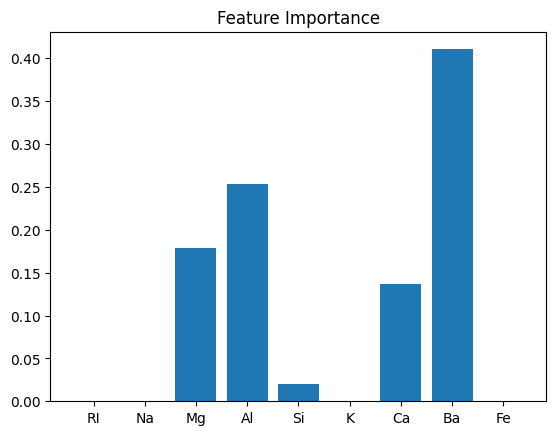

In [57]:
plt.bar(df_imp["Feature"],df_imp["Importance"])
plt.title("Feature Importance")
plt.show()